# XgBoost Classifier for Predicting Customer Behavior and Product Likeability   

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

## Loading preprocessed data

In [34]:
# Load and parse the CSV files correctly for training data
x_train_file = 'X_train.csv'  # Replace with the actual file path for features
y_train_file = 'y_train.csv'  # Replace with the actual file path for target labels

# Load the feature dataset
X = pd.read_csv(x_train_file, sep=',')  # Load features
y = pd.read_csv(y_train_file, sep=',')['target'].values  # Load target


In [35]:
X.info

<bound method DataFrame.info of            cont_0        cont_1      cont_2        cont_3         cont_4  \
0      499.745000   3253.692500   21333.815   1585.600000   21352.150000   
1      709.923333   8712.665833  142218.741   6662.633333  141548.543333   
2      499.922500   4972.175833   90172.371   2325.390000   89584.230000   
3      456.444167  14235.760833   24852.985   5104.760000   14500.960000   
4      770.035833  10646.623333  161383.483   3548.100000  160090.916667   
...           ...           ...         ...           ...            ...   
12231  119.129167  10783.285000   52911.825   4606.420000   52342.353333   
12232  640.532500  13553.443333   19559.155  11038.513333   22780.493333   
12233   23.333333   7215.031667   65375.633   6036.473333   61282.260000   
12234    2.416667   5234.933333  300767.158   2501.816667  300843.800000   
12235    7.137500   8067.004167   61253.435   1761.566667   61842.743333   

         cont_5       cont_6  cont_7      cont_9  cont_

In [36]:
y

array([0., 0., 0., ..., 0., 0., 0.])

## Creating trasforming pipelines 

In [37]:
# Define numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Numerical features
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()  # Categorical features

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', 'passthrough', categorical_columns)  # Keep categorical features as is
    ]
)

## Initializing XGBoost model

In [38]:

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Create the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', xgb_model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(estimator=final_pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['cont_0',
                                                                          'cont_1',
                                                                          'cont_2',
                                                                          'cont_3',
                                                                          'cont_4',
                                                                          'cont_5',
                                                                          'cont_6',
                                                                          'cont_7',
                                                                          'cont_9',
                                                                          'cont_14',
                                                                          'cont_15',
                                                                          'cat_1_B1',
                                                                          'cat_1_B2',
                                                                          'cat_1_B3']),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         [])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=N...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

## Hyperparameter tuning using GridSearchCV

In [39]:
# Best model after Grid Search
best_model = grid_search.best_estimator_

# Make predictions with the best model
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Print predictions for the first 10 samples in training and testing
print(f"Training Predictions: {train_preds[:10]}")
print(f"Test Predictions: {test_preds[:10]}")


Training Predictions: [0 0 0 0 0 0 0 0 0 0]
Test Predictions: [0 0 0 0 0 0 0 0 0 0]


## Plotting results

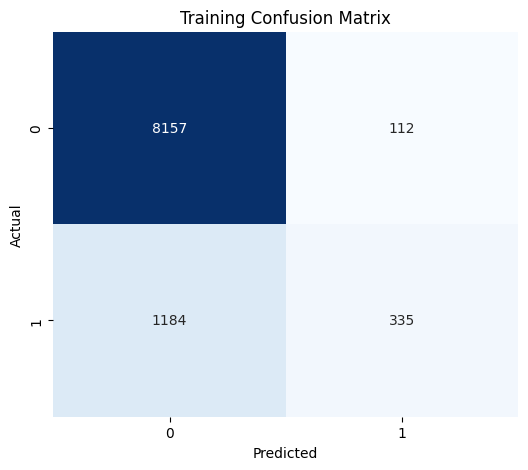

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      8269
         1.0       0.75      0.22      0.34      1519

    accuracy                           0.87      9788
   macro avg       0.81      0.60      0.63      9788
weighted avg       0.85      0.87      0.84      9788



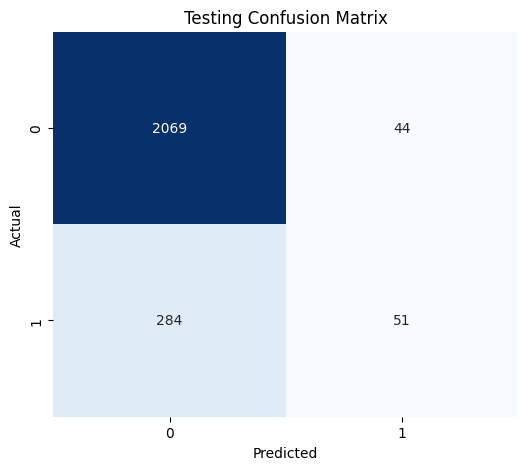

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2113
         1.0       0.54      0.15      0.24       335

    accuracy                           0.87      2448
   macro avg       0.71      0.57      0.58      2448
weighted avg       0.83      0.87      0.83      2448

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best Score: 0.849816599282256


In [40]:
# Function to plot confusion matrix
def plot_confusion_matrix(true_values, predictions, set_name):
    matrix = confusion_matrix(true_values, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{set_name} Confusion Matrix')
    plt.show()

# Function to print classification report
def print_classification_report(true_values, predictions, set_name):
    report = classification_report(true_values, predictions)
    print(f"{set_name} Classification Report:")
    print(report)

# Visualize and print reports for both sets
plot_confusion_matrix(y_train, train_preds, "Training")
print_classification_report(y_train, train_preds, "Training")
plot_confusion_matrix(y_test, test_preds, "Testing")
print_classification_report(y_test, test_preds, "Testing")

# Print best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


## Calculating ROC AUC score on testset

ROC AUC scores from cross-validation: [0.77870386 0.77880389 0.78022737 0.77386795 0.78979247]
Mean ROC AUC: 0.7803, Standard Deviation: 0.0052


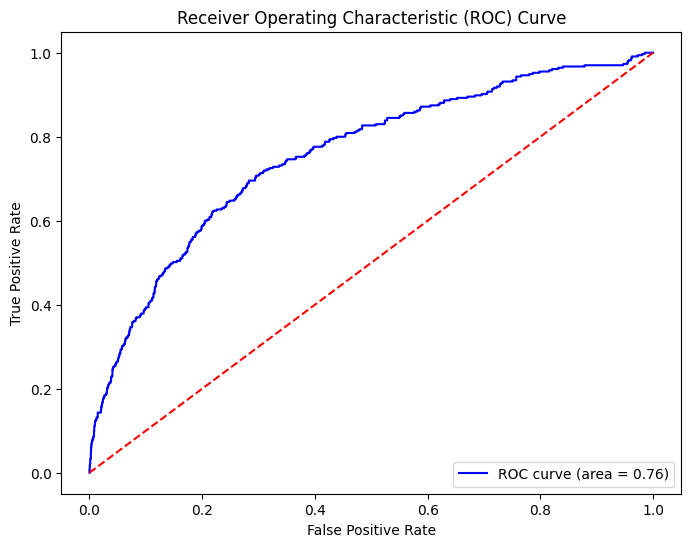

In [41]:
# Calculate ROC AUC score with cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"ROC AUC scores from cross-validation: {cv_scores}")
print(f"Mean ROC AUC: {np.mean(cv_scores):.4f}, Standard Deviation: {np.std(cv_scores):.4f}")

# Plot ROC Curve
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Loading and preprocessing new testset

In [43]:

# Load and preprocess the test set for predictions
test_file = 'test_en2.csv'  # Replace with the actual file path for your test set
X_test_set = pd.read_csv(test_file, sep=',')  # Load the test set

# Drop unnecessary columns from the test set
X_test_set = X_test_set.drop(columns=['ID', 'Unnamed: 0'], errors='ignore')  # Adjust as needed

# Handle missing categorical columns by adding them with default values
for col in categorical_columns:
    if col not in X_test_set.columns:
        X_test_set[col] = 'Missing'  # Fill with a default value, adjust as needed

# Ensure test set has the same categorical columns as training set
X_test_set = X_test_set[categorical_columns + numerical_columns]

# Transform the test set using the entire fitted pipeline
test_preds = best_model.predict(X_test_set)

# Output predictions to a CSV file
predictions_df = pd.DataFrame(test_preds, columns=['Predicted'])
predictions_df.to_csv('predicted_targets_test_set.csv', index=False)  # Save predictions to a CSV file
print("Predictions saved to 'predicted_targets_test_set.csv'.")


Predictions saved to 'predicted_targets_test_set.csv'.


### Analysing feature importance using SHAP library

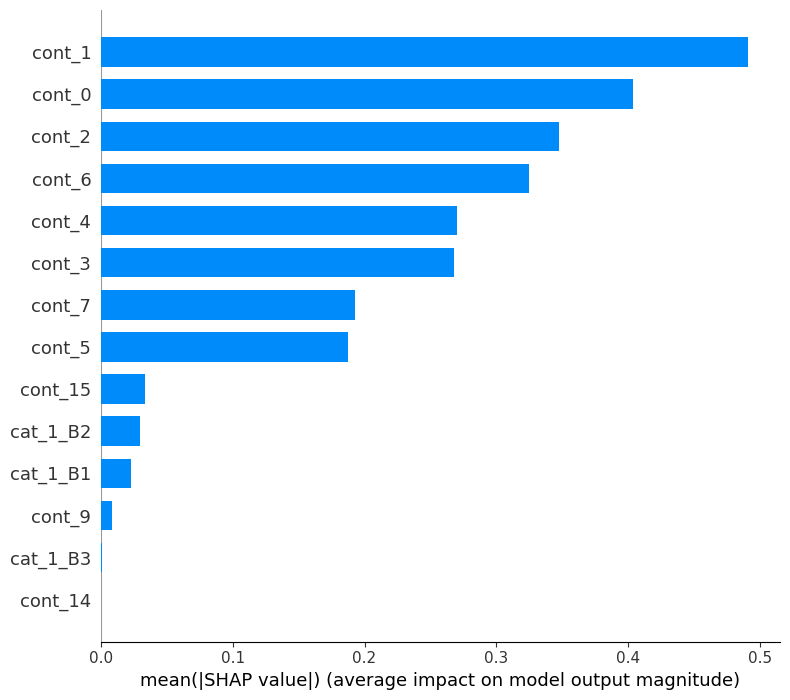

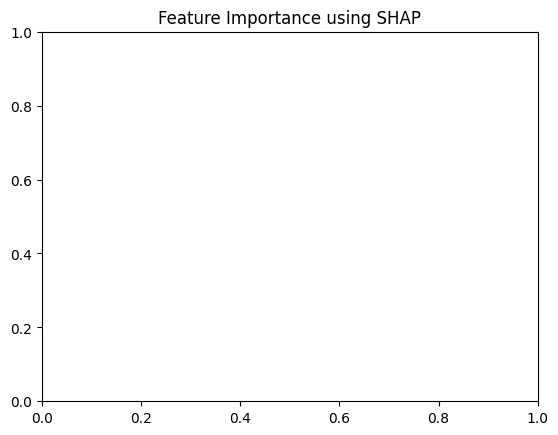

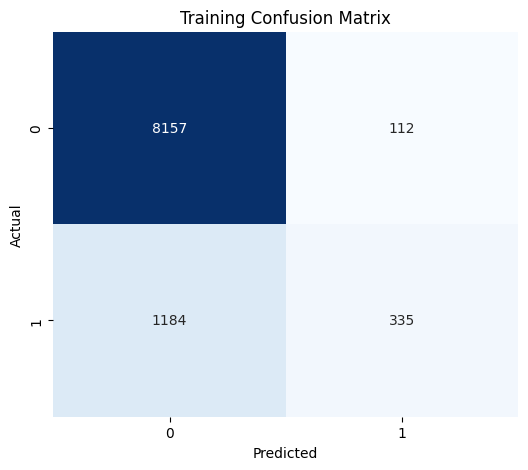

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      8269
         1.0       0.75      0.22      0.34      1519

    accuracy                           0.87      9788
   macro avg       0.81      0.60      0.63      9788
weighted avg       0.85      0.87      0.84      9788

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best Score: 0.849816599282256


In [54]:
import shap
# SHAP Values Calculation
# Note: You must use the underlying model to compute SHAP values
explainer = shap.Explainer(best_model.named_steps['classifier'])
shap_values = explainer(X_train)  # Calculate SHAP values for the training set

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.title("Feature Importance using SHAP")
plt.show()

# Visualize and print reports for both sets
def plot_confusion_matrix(true_values, predictions, set_name):
    matrix = confusion_matrix(true_values, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{set_name} Confusion Matrix')
    plt.show()

def print_classification_report(true_values, predictions, set_name):
    report = classification_report(true_values, predictions)
    print(f"{set_name} Classification Report:")
    print(report)

# Visualize and print reports for both training and testing sets
plot_confusion_matrix(y_train, train_preds, "Training")
print_classification_report(y_train, train_preds, "Training")

# Print best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)